In [44]:
import pandas as pd

res = pd.read_excel("/mnt/c/Users/spask/Downloads/Product Slate Export.xlsx", header=4)
res.columns = ['_'.join([c.lower() for c in col.split(' ')]) for col in res.columns]
res = res[~res.isna()]
res['volume'] = res.volume.apply(lambda x: int(x.replace(',', '')))
res = res[res.volume > 1000]
res = res[res.cleared_as == 'Futures']
res = res.reset_index(drop=True)
tickers_to_remove = [
	"BFF", "BZ", "TTF", "HTT", "HP", "NPG", "QM", "CSX", "BK", "QG" "SDA", "E7", "TN", "ZB", "UB", "Z3N", "10Y", "PA", "SGU"
]
res = res[~res.globex.isin(tickers_to_remove)]
res = res[['product_name', 'globex', 'exchange', 'volume', 'asset_class']]
res.shape

(42, 5)

In [45]:
res.groupby('asset_class').apply(lambda g: g.sort_values('volume', ascending=False))

/tmp/ipykernel_807924/2188354366.py:1: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  res.groupby('asset_class').apply(lambda g: g.sort_values('volume', ascending=False))


product_name globex  \
asset_class                                                                     
Cryptocurrencies 0                                 Micro Ether Futures    MET   
                 1                               Micro Bitcoin Futures    MBT   
                 3                                       Ether Futures    ETH   
                 2                                     Bitcoin Futures    BTC   
Energy           5                                   Crude Oil Futures     CL   
                 6                       Henry Hub Natural Gas Futures     NG   
                 14                        Micro WTI Crude Oil Futures    MCL   
                 8   Natural Gas (Henry Hub) Last-day Financial Fut...     HH   
                 15                Micro Henry Hub Natural Gas Futures    MNG   
                 16                         E-mini Natural Gas Futures     QG   
Equities         19                             E-mini S&P 500 Futures     ES   
                 25              Micro E-mini Nasdaq-100 Index Futures    MNQ   
                 24                 Micro E-mini S&P 500 Index Futures    MES   
                 23                          E-mini Nasdaq-100 Futures     NQ   
                 21                  E-mini Russell 2000 Index Futures    RTY   
                 28            Micro E-mini Russell 2000 Index Futures    M2K   
                 27                               Nikkei (JPY) Futures    NIY   
                 20  Adjusted Interest Rate S&P 500 Total Return (E...    ASR   
                 26                      E-mini S&P MidCap 400 Futures    EMD   
                 30                         Micro Nikkei (JPY) Futures    MNI   
                 29                               Nikkei (USD) Futures    NKD   
                 22              S&P 500 Annual Dividend Index Futures    SDA   
FX               31                                    Euro FX Futures     6E   
                 33                               Japanese Yen Futures     6J   
                 32                            Canadian Dollar Futures     6C   
                 34                              British Pound Futures     6B   
                 35                          Australian Dollar Futures     6A   
                 36                         New Zealand Dollar Futures     6N   
                 37                                Swiss Franc Futures     6S   
                 38                              Micro EUR/USD Futures    M6E   
                 40                              Micro AUD/USD Futures    M6A   
                 43                              Micro GBP/USD Futures    M6B   
                 41                              Micro CAD/USD Futures    MCD   
                 42                              Micro CHF/USD Futures    MSF   
Interest Rate    45                             10-Year T-Note Futures     ZN   
                 44                              5-Year T-Note Futures     ZF   
                 46                              2-Year T-Note Futures     ZT   
Metals           52                                       Gold Futures     GC   
                 55                                 Micro Gold Futures    MGC   
                 53                                     Silver Futures     SI   
                 54                                   Platinum Futures     PL   
                 57                               Micro Silver Futures    SIL   

                    exchange   volume       asset_class  
asset_class                                              
Cryptocurrencies 0       CME   184492  Cryptocurrencies  
                 1       CME   100917  Cryptocurrencies  
                 3       CME    14630  Cryptocurrencies  
                 2       CME    14238  Cryptocurrencies  
Energy           5     NYMEX   942731            Energy  
                 6     NYMEX   547949            Energy  
                 14    NYMEX 

### Commissions
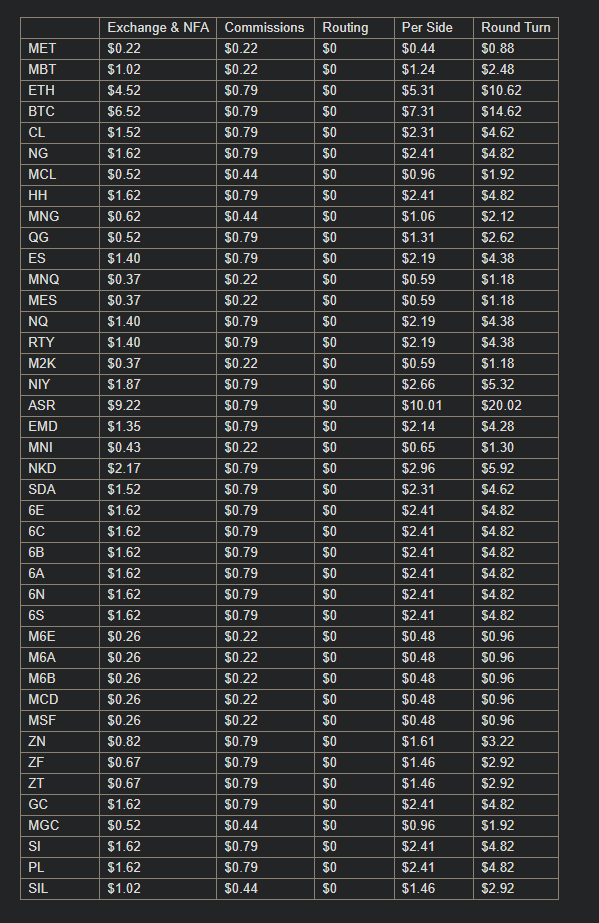